In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("final_book_dataset_kaggle.csv")
df.head()

title  \
0  Becoming a Data Head: How to Think Speak and U...   
1  Ace the Data Science Interview: 201 Real Inter...   
2  Fundamentals of Data Engineering: Plan and Bui...   
3  Essential Math for Data Science: Take Control ...   
4  Data Science for Business: What You Need to Kn...   

                              author  price  pages  avg_reviews  n_reviews  \
0  [Alex J. Gutman,Jordan Goldmeier]  24.49  272.0          4.6        184   
1             [Nick Singh,Kevin Huo]  26.00  301.0          4.5        599   
2            [Joe Reis,Matt Housley]  50.76  446.0          5.0         33   
3                     [Thomas Nield]  44.80  347.0          4.5         27   
4       [Foster Provost,Tom Fawcett]  36.99  413.0          4.5        970   

   star5  star4  star3  star2  star1             dimensions       weight  \
0   0.74   0.18   0.05   0.02   0.01    6 x 0.62 x 9 inches  12.5 ounces   
1   0.77   0.10   0.06   0.03   0.04   7 x 0.68 x 10 inches  1.28 pounds   
2   0.96   0.04   0.00   0.00   0.00    7 x 1 x 9.25 inches  1.57 pounds   
3   0.79   0.05   0.05   0.05   0.05    7 x 0.75 x 9 inches  1.23 pounds   
4   0.71   0.15   0.08   0.03   0.03  7 x 0.9 x 9.19 inches   1.5 pounds   

  language                                        publisher         ISBN_13  \
0  English               Wiley; 1st edition (April 23 2021)  978-1119741749   
1  English  Ace the Data Science Interview (August 16 2021)  978-0578973838   
2  English        OReilly Media; 1st edition (July 26 2022)  978-1098108304   
3  English         OReilly Media; 1st edition (July 5 2022)  978-1098102937   
4  English   OReilly Media; 1st edition (September 17 2013)  978-1449361327   

                                                link  \
0  /Becoming-Data-Head-Understand-Statistics/dp/1...   
1  /Ace-Data-Science-Interview-Questions/dp/05789...   
2  /Fundamentals-Data-Engineering-Robust-Systems/...   
3  /Essential-Math-Data-Science-Fundamental/dp/10...   
4  /Data-Science-Business-Data-Analytic-Thinking/...   

                                       complete_link  
0  https://www.amazon.com/Becoming-Data-Head-Unde...  
1  https://www.amazon.com/Ace-Data-Science-Interv...  
2  https://www.amazon.com/Fundamentals-Data-Engin...  
3  https://www.amazon.com/Essential-Math-Data-Sci...  
4  https://www.amazon.com/Data-Science-Business-D...

In [5]:
pd.isnull(df).sum()

title              0
author           122
price              2
pages             12
avg_reviews      123
n_reviews          0
star5              0
star4              0
star3              0
star2              0
star1              0
dimensions        32
weight             3
language           3
publisher          4
ISBN_13            1
link               0
complete_link      0
dtype: int64

In [6]:
pd.isnull(df).sum()/len(df)*100


title             0.000000
author           12.896406
price             0.211416
pages             1.268499
avg_reviews      13.002114
n_reviews         0.000000
star5             0.000000
star4             0.000000
star3             0.000000
star2             0.000000
star1             0.000000
dimensions        3.382664
weight            0.317125
language          0.317125
publisher         0.422833
ISBN_13           0.105708
link              0.000000
complete_link     0.000000
dtype: float64

In [7]:
#cleaning data
df=df.dropna()

In [8]:
#desribe your data 
df.info()         #contains 698rows with 18columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 945
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          698 non-null    object 
 1   author         698 non-null    object 
 2   price          698 non-null    float64
 3   pages          698 non-null    float64
 4   avg_reviews    698 non-null    float64
 5   n_reviews      698 non-null    int64  
 6   star5          698 non-null    float64
 7   star4          698 non-null    float64
 8   star3          698 non-null    float64
 9   star2          698 non-null    float64
 10  star1          698 non-null    float64
 11  dimensions     698 non-null    object 
 12  weight         698 non-null    object 
 13  language       698 non-null    object 
 14  publisher      698 non-null    object 
 15  ISBN_13        698 non-null    object 
 16  link           698 non-null    object 
 17  complete_link  698 non-null    object 
dtypes: float64

In [9]:
df.head()

title  \
0  Becoming a Data Head: How to Think Speak and U...   
1  Ace the Data Science Interview: 201 Real Inter...   
2  Fundamentals of Data Engineering: Plan and Bui...   
3  Essential Math for Data Science: Take Control ...   
4  Data Science for Business: What You Need to Kn...   

                              author  price  pages  avg_reviews  n_reviews  \
0  [Alex J. Gutman,Jordan Goldmeier]  24.49  272.0          4.6        184   
1             [Nick Singh,Kevin Huo]  26.00  301.0          4.5        599   
2            [Joe Reis,Matt Housley]  50.76  446.0          5.0         33   
3                     [Thomas Nield]  44.80  347.0          4.5         27   
4       [Foster Provost,Tom Fawcett]  36.99  413.0          4.5        970   

   star5  star4  star3  star2  star1             dimensions       weight  \
0   0.74   0.18   0.05   0.02   0.01    6 x 0.62 x 9 inches  12.5 ounces   
1   0.77   0.10   0.06   0.03   0.04   7 x 0.68 x 10 inches  1.28 pounds   
2   0.96   0.04   0.00   0.00   0.00    7 x 1 x 9.25 inches  1.57 pounds   
3   0.79   0.05   0.05   0.05   0.05    7 x 0.75 x 9 inches  1.23 pounds   
4   0.71   0.15   0.08   0.03   0.03  7 x 0.9 x 9.19 inches   1.5 pounds   

  language                                        publisher         ISBN_13  \
0  English               Wiley; 1st edition (April 23 2021)  978-1119741749   
1  English  Ace the Data Science Interview (August 16 2021)  978-0578973838   
2  English        OReilly Media; 1st edition (July 26 2022)  978-1098108304   
3  English         OReilly Media; 1st edition (July 5 2022)  978-1098102937   
4  English   OReilly Media; 1st edition (September 17 2013)  978-1449361327   

                                                link  \
0  /Becoming-Data-Head-Understand-Statistics/dp/1...   
1  /Ace-Data-Science-Interview-Questions/dp/05789...   
2  /Fundamentals-Data-Engineering-Robust-Systems/...   
3  /Essential-Math-Data-Science-Fundamental/dp/10...   
4  /Data-Science-Business-Data-Analytic-Thinking/...   

                                       complete_link  
0  https://www.amazon.com/Becoming-Data-Head-Unde...  
1  https://www.amazon.com/Ace-Data-Science-Interv...  
2  https://www.amazon.com/Fundamentals-Data-Engin...  
3  https://www.amazon.com/Essential-Math-Data-Sci...  
4  https://www.amazon.com/Data-Science-Business-D...

In [13]:
df.duplicated().any()

False

In [14]:
#to find column catagories
cat_col=df.select_dtypes(include=("O")).columns
cat_col

Index(['title', 'author', 'dimensions', 'weight', 'language', 'publisher',
       'ISBN_13', 'link', 'complete_link'],
      dtype='object')

In [15]:
#Rename Columns
df.rename(columns={'ISBN_13':"ISBN",},inplace=True)
df

title  \
price                                                       
24.49   Becoming a Data Head: How to Think Speak and U...   
26.00   Ace the Data Science Interview: 201 Real Inter...   
50.76   Fundamentals of Data Engineering: Plan and Bui...   
44.80   Essential Math for Data Science: Take Control ...   
36.99   Data Science for Business: What You Need to Kn...   
...                                                   ...   
28.33   The Book of R: A First Course in Programming a...   
59.23   Basic Business Statistics: A Casebook (Textboo...   
129.99         Elementary Statistics: Picturing the World   
47.76   Making Sense of Statistics: A Conceptual Overview   
15.55                   Psychology Statistics For Dummies   

                                         author  pages  avg_reviews  \
price                                                                 
24.49         [Alex J. Gutman,Jordan Goldmeier]  272.0          4.6   
26.00                    [Nick Singh,Kevin Huo]  301.0          4.5   
50.76                   [Joe Reis,Matt Housley]  446.0          5.0   
44.80                            [Thomas Nield]  347.0          4.5   
36.99              [Foster Provost,Tom Fawcett]  413.0          4.5   
...                                         ...    ...          ...   
28.33                        [Tilman M. Davies]  832.0          4.6   
59.23   [Dean P. Foster,Robert A. Stine et al.]  260.0          4.3   
129.99                [Ron Larson,Betsy Farber]  704.0          4.5   
47.76              [Fred Pyrczak,Deborah M. Oh]  252.0          4.6   
15.55           [Donncha Hanna,Martin Dempster]  464.0          4.5   

        n_reviews  star5  star4  star3  star2  star1  \
price                                                  
24.49         184   0.74   0.18   0.05   0.02   0.01   
26.00         599   0.77   0.10   0.06   0.03   0.04   
50.76          33   0.96   0.04   0.00   0.00   0.00   
44.80          27   0.79   0.05   0.05   0.05   0.05   
36.99         970   0.71   0.15   0.08   0.03   0.03   
...           ...    ...    ...    ...    ...    ...   
28.33         327   0.74   0.16   0.06   0.02   0.03   
59.23           6   0.70   0.11   0.19   0.00   0.00   
129.99       1025   0.72   0.14   0.07   0.01   0.05   
47.76         145   0.78   0.13   0.04   0.02   0.04   
15.55         787   0.69   0.18   0.08   0.03   0.03   

                       dimensions       weight language  \
price                                                     
24.49         6 x 0.62 x 9 inches  12.5 ounces  English   
26.00        7 x 0.68 x 10 inches  1.28 pounds  English   
50.76         7 x 1 x 9.25 inches  1.57 pounds  English   
44.80         7 x 0.75 x 9 inches  1.23 pounds  English   
36.99       7 x 0.9 x 9.19 inches   1.5 pounds  English   
...                           ...          ...      ...   
28.33      7 x 1.44 x 9.25 inches  2.95 pounds  English   
59.23   8.27 x 0.6 x 11.02 inches  2.93 pounds  English   
129.99      8.5 x 1.1 x 11 inches  3.48 pounds  English   
47.76      8.5 x 0.57 x 11 inches  1.12 pounds  English   
15.55        7.4 x 1 x 9.3 inches  1.86 pounds  English   

                                                publisher            ISBN  \
price                                                                       
24.49                  Wiley; 1st edition (April 23 2021)  978-1119741749   
26.00     Ace the Data Science Interview (August 16 2021)  978-0578973838   
50.76           OReilly Media; 1st edition (July 26 2022)  978-1098108304   
44.80            OReilly Media; 1st edition (July 5 2022)  978-1098102937   
36.99      OReilly Media; 1st edition (September 17 2013)  978-1449361327   
...                                                   ...             ...   
28.33         No Starch Press; 1st edition (July 16 2016)  978-1593276515   
59.23   Springer; 1st ed. 1998. 4th printing 2001 edit...  978-0387983547   
129.99              Pearson; 7th edition (January 3 2018)  978-0134

ISBN_13 NAME CHANGED TO ISBN

In [16]:
#to find columns of integer and float
num_col=df.select_dtypes(include=["int",'float']).columns
num_col

Index(['pages', 'avg_reviews', 'n_reviews', 'star5', 'star4', 'star3', 'star2',
       'star1'],
      dtype='object')

In [18]:
df.describe()

pages  avg_reviews    n_reviews       star5       star4  \
count   698.000000   698.000000   698.000000  698.000000  698.000000   
mean    430.237822     4.444556   150.881089    0.719140    0.162020   
std     204.349437     0.401976   535.166053    0.150545    0.105296   
min      48.000000     1.000000     1.000000    0.110000    0.000000   
25%     286.250000     4.300000    10.000000    0.620000    0.110000   
50%     392.000000     4.500000    33.000000    0.720000    0.150000   
75%     543.500000     4.700000   101.750000    0.800000    0.200000   
max    1728.000000     5.000000  7563.000000    1.000000    0.630000   

            star3       star2       star1  
count  698.000000  698.000000  698.000000  
mean     0.067049    0.030444    0.021261  
std      0.063199    0.040292    0.033373  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.060000    0.020000    0.000000  
75%      0.090000    0.040000    0.037500  
max      0.400000    0.250000    0.230000

In [19]:
df.describe(include='O') #display the values

title            author  \
count                                                 698               698   
unique                                                698               653   
top     Becoming a Data Head: How to Think Speak and U...  [ERICK THOMPSON]   
freq                                                    1                 5   

                      dimensions      weight language  \
count                        698         698      698   
unique                       529         269        2   
top     7.38 x 0.8 x 9.25 inches  1.6 pounds  English   
freq                           7          10      697   

                              publisher            ISBN  \
count                               698             698   
unique                              650             698   
top     Packt Publishing (July 29 2022)  978-1119741749   
freq                                  4               1   

                                                     link  \
count                                                 698   
unique                                                698   
top     /Becoming-Data-Head-Understand-Statistics/dp/1...   
freq                                                    1   

                                            complete_link  
count                                                 698  
unique                                                698  
top     https://www.amazon.com/Becoming-Data-Head-Unde...  
freq                                                    1

In [20]:
#reset index
df.reset_index(drop=True,inplace=True)
df.head()

title  \
0  Becoming a Data Head: How to Think Speak and U...   
1  Ace the Data Science Interview: 201 Real Inter...   
2  Fundamentals of Data Engineering: Plan and Bui...   
3  Essential Math for Data Science: Take Control ...   
4  Data Science for Business: What You Need to Kn...   

                              author  pages  avg_reviews  n_reviews  star5  \
0  [Alex J. Gutman,Jordan Goldmeier]  272.0          4.6        184   0.74   
1             [Nick Singh,Kevin Huo]  301.0          4.5        599   0.77   
2            [Joe Reis,Matt Housley]  446.0          5.0         33   0.96   
3                     [Thomas Nield]  347.0          4.5         27   0.79   
4       [Foster Provost,Tom Fawcett]  413.0          4.5        970   0.71   

   star4  star3  star2  star1             dimensions       weight language  \
0   0.18   0.05   0.02   0.01    6 x 0.62 x 9 inches  12.5 ounces  English   
1   0.10   0.06   0.03   0.04   7 x 0.68 x 10 inches  1.28 pounds  English   
2   0.04   0.00   0.00   0.00    7 x 1 x 9.25 inches  1.57 pounds  English   
3   0.05   0.05   0.05   0.05    7 x 0.75 x 9 inches  1.23 pounds  English   
4   0.15   0.08   0.03   0.03  7 x 0.9 x 9.19 inches   1.5 pounds  English   

                                         publisher            ISBN  \
0               Wiley; 1st edition (April 23 2021)  978-1119741749   
1  Ace the Data Science Interview (August 16 2021)  978-0578973838   
2        OReilly Media; 1st edition (July 26 2022)  978-1098108304   
3         OReilly Media; 1st edition (July 5 2022)  978-1098102937   
4   OReilly Media; 1st edition (September 17 2013)  978-1449361327   

                                                link  \
0  /Becoming-Data-Head-Understand-Statistics/dp/1...   
1  /Ace-Data-Science-Interview-Questions/dp/05789...   
2  /Fundamentals-Data-Engineering-Robust-Systems/...   
3  /Essential-Math-Data-Science-Fundamental/dp/10...   
4  /Data-Science-Business-Data-Analytic-Thinking/...   

                                       complete_link  
0  https://www.amazon.com/Becoming-Data-Head-Unde...  
1  https://www.amazon.com/Ace-Data-Science-Interv...  
2  https://www.amazon.com/Fundamentals-Data-Engin...  
3  https://www.amazon.com/Essential-Math-Data-Sci...  
4  https://www.amazon.com/Data-Science-Business-D...

In [21]:
#index sorting
df.sort_index()

title  \
0    Becoming a Data Head: How to Think Speak and U...   
1    Ace the Data Science Interview: 201 Real Inter...   
2    Fundamentals of Data Engineering: Plan and Bui...   
3    Essential Math for Data Science: Take Control ...   
4    Data Science for Business: What You Need to Kn...   
..                                                 ...   
693  The Book of R: A First Course in Programming a...   
694  Basic Business Statistics: A Casebook (Textboo...   
695         Elementary Statistics: Picturing the World   
696  Making Sense of Statistics: A Conceptual Overview   
697                  Psychology Statistics For Dummies   

                                      author  pages  avg_reviews  n_reviews  \
0          [Alex J. Gutman,Jordan Goldmeier]  272.0          4.6        184   
1                     [Nick Singh,Kevin Huo]  301.0          4.5        599   
2                    [Joe Reis,Matt Housley]  446.0          5.0         33   
3                             [Thomas Nield]  347.0          4.5         27   
4               [Foster Provost,Tom Fawcett]  413.0          4.5        970   
..                                       ...    ...          ...        ...   
693                       [Tilman M. Davies]  832.0          4.6        327   
694  [Dean P. Foster,Robert A. Stine et al.]  260.0          4.3          6   
695                [Ron Larson,Betsy Farber]  704.0          4.5       1025   
696             [Fred Pyrczak,Deborah M. Oh]  252.0          4.6        145   
697          [Donncha Hanna,Martin Dempster]  464.0          4.5        787   

     star5  star4  star3  star2  star1                 dimensions  \
0     0.74   0.18   0.05   0.02   0.01        6 x 0.62 x 9 inches   
1     0.77   0.10   0.06   0.03   0.04       7 x 0.68 x 10 inches   
2     0.96   0.04   0.00   0.00   0.00        7 x 1 x 9.25 inches   
3     0.79   0.05   0.05   0.05   0.05        7 x 0.75 x 9 inches   
4     0.71   0.15   0.08   0.03   0.03      7 x 0.9 x 9.19 inches   
..     ...    ...    ...    ...    ...                        ...   
693   0.74   0.16   0.06   0.02   0.03     7 x 1.44 x 9.25 inches   
694   0.70   0.11   0.19   0.00   0.00  8.27 x 0.6 x 11.02 inches   
695   0.72   0.14   0.07   0.01   0.05      8.5 x 1.1 x 11 inches   
696   0.78   0.13   0.04   0.02   0.04     8.5 x 0.57 x 11 inches   
697   0.69   0.18   0.08   0.03   0.03       7.4 x 1 x 9.3 inches   

          weight language                                          publisher  \
0    12.5 ounces  English                 Wiley; 1st edition (April 23 2021)   
1    1.28 pounds  English    Ace the Data Science Interview (August 16 2021)   
2    1.57 pounds  English          OReilly Media; 1st edition (July 26 2022)   
3    1.23 pounds  English           OReilly Media; 1st edition (July 5 2022)   
4     1.5 pounds  English     OReilly Media; 1st edition (September 17 2013)   
..           ...      ...                                                ...   
693  2.95 pounds  English        No Starch Press; 1st edition (July 16 2016)   
694  2.93 pounds  English  Springer; 1st ed. 1998. 4th printing 2001 edit...   
695  3.48 pounds  English              Pearson; 7th edition (January 3 2018)   
696  1.12 pounds  English              Routledge; 7th edition (June 18 2018)   
697  1.86 pounds  English         For Dummies; 1st edition (January 29 2013)   

               ISBN                                               link  \
0    978-1119741749  /Becoming-Data-Head-Understand-Statistics/dp/1...   
1    978-0578973838  /Ace-Data-Science-Interview-Questions/dp/05789...   
2    978-1098108304  /Fundamentals-Data-Engineering-Robust-Systems/...   
3    978-1098102937  /Essential-Math-Data-Science-Fundamental/dp/10...   
4    978-1449361327  /Data-Science-Business-Data-Analytic-Thinking/...   
..              ...                                                ...   
693  978-1593276515  /Book-First-Course-Programming-Statistics/dp/1...   
694  978-0387983547  

In [22]:
#Check no. of unique value present in each column
df.nunique()

title            698
author           653
pages            332
avg_reviews       22
n_reviews        232
star5             65
star4             51
star3             32
star2             21
star1             19
dimensions       529
weight           269
language           2
publisher        650
ISBN             698
link             698
complete_link    698
dtype: int64

In [23]:
#find the columns and records 
df.shape

(698, 17)

In [25]:
df2=pd.DataFrame(df.groupby('avg_reviews')['n_reviews'].value_counts())
df2

n_reviews
avg_reviews n_reviews           
1.0         1                  1
2.0         1                  1
3.0         2                  2
            1                  1
3.1         18                 1
...                          ...
5.0         9                  1
            13                 1
            14                 1
            17                 1
            33                 1

[524 rows x 1 columns]

In [27]:
df['avg_reviews'].value_counts()

4.6    106
4.5    100
4.4     86
5.0     70
4.7     68
4.3     57
4.2     44
4.8     36
4.1     31
4.0     20
4.9     17
3.9     15
3.8     10
3.5     10
3.7      9
3.3      5
3.2      4
3.6      4
3.0      3
1.0      1
2.0      1
3.1      1
Name: avg_reviews, dtype: int64

#4.6 106 has highest average reviews

In [28]:
plt.figure(figsize=(8,8))
df['avg_reviews'].value_counts().plot(kind="bar")

<AxesSubplot: >

rating 4.6 has the highest Ratings  #Bar plot

In [29]:
df.columns

Index(['title', 'author', 'pages', 'avg_reviews', 'n_reviews', 'star5',
       'star4', 'star3', 'star2', 'star1', 'dimensions', 'weight', 'language',
       'publisher', 'ISBN', 'link', 'complete_link'],
      dtype='object')

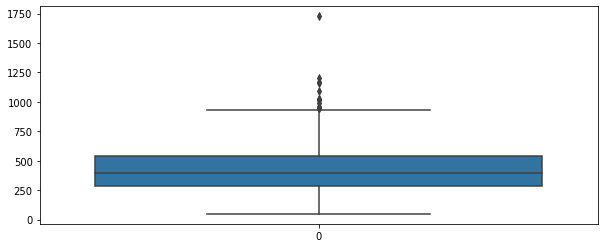

In [31]:
plt.figure(figsize=(10,4))
sns.boxplot(df['pages'])
plt.show()

In [32]:
df['n_reviews'].value_counts()

1      27
2      25
3      21
6      20
8      19
       ..
134     1
279     1
96      1
152     1
787     1
Name: n_reviews, Length: 232, dtype: int64

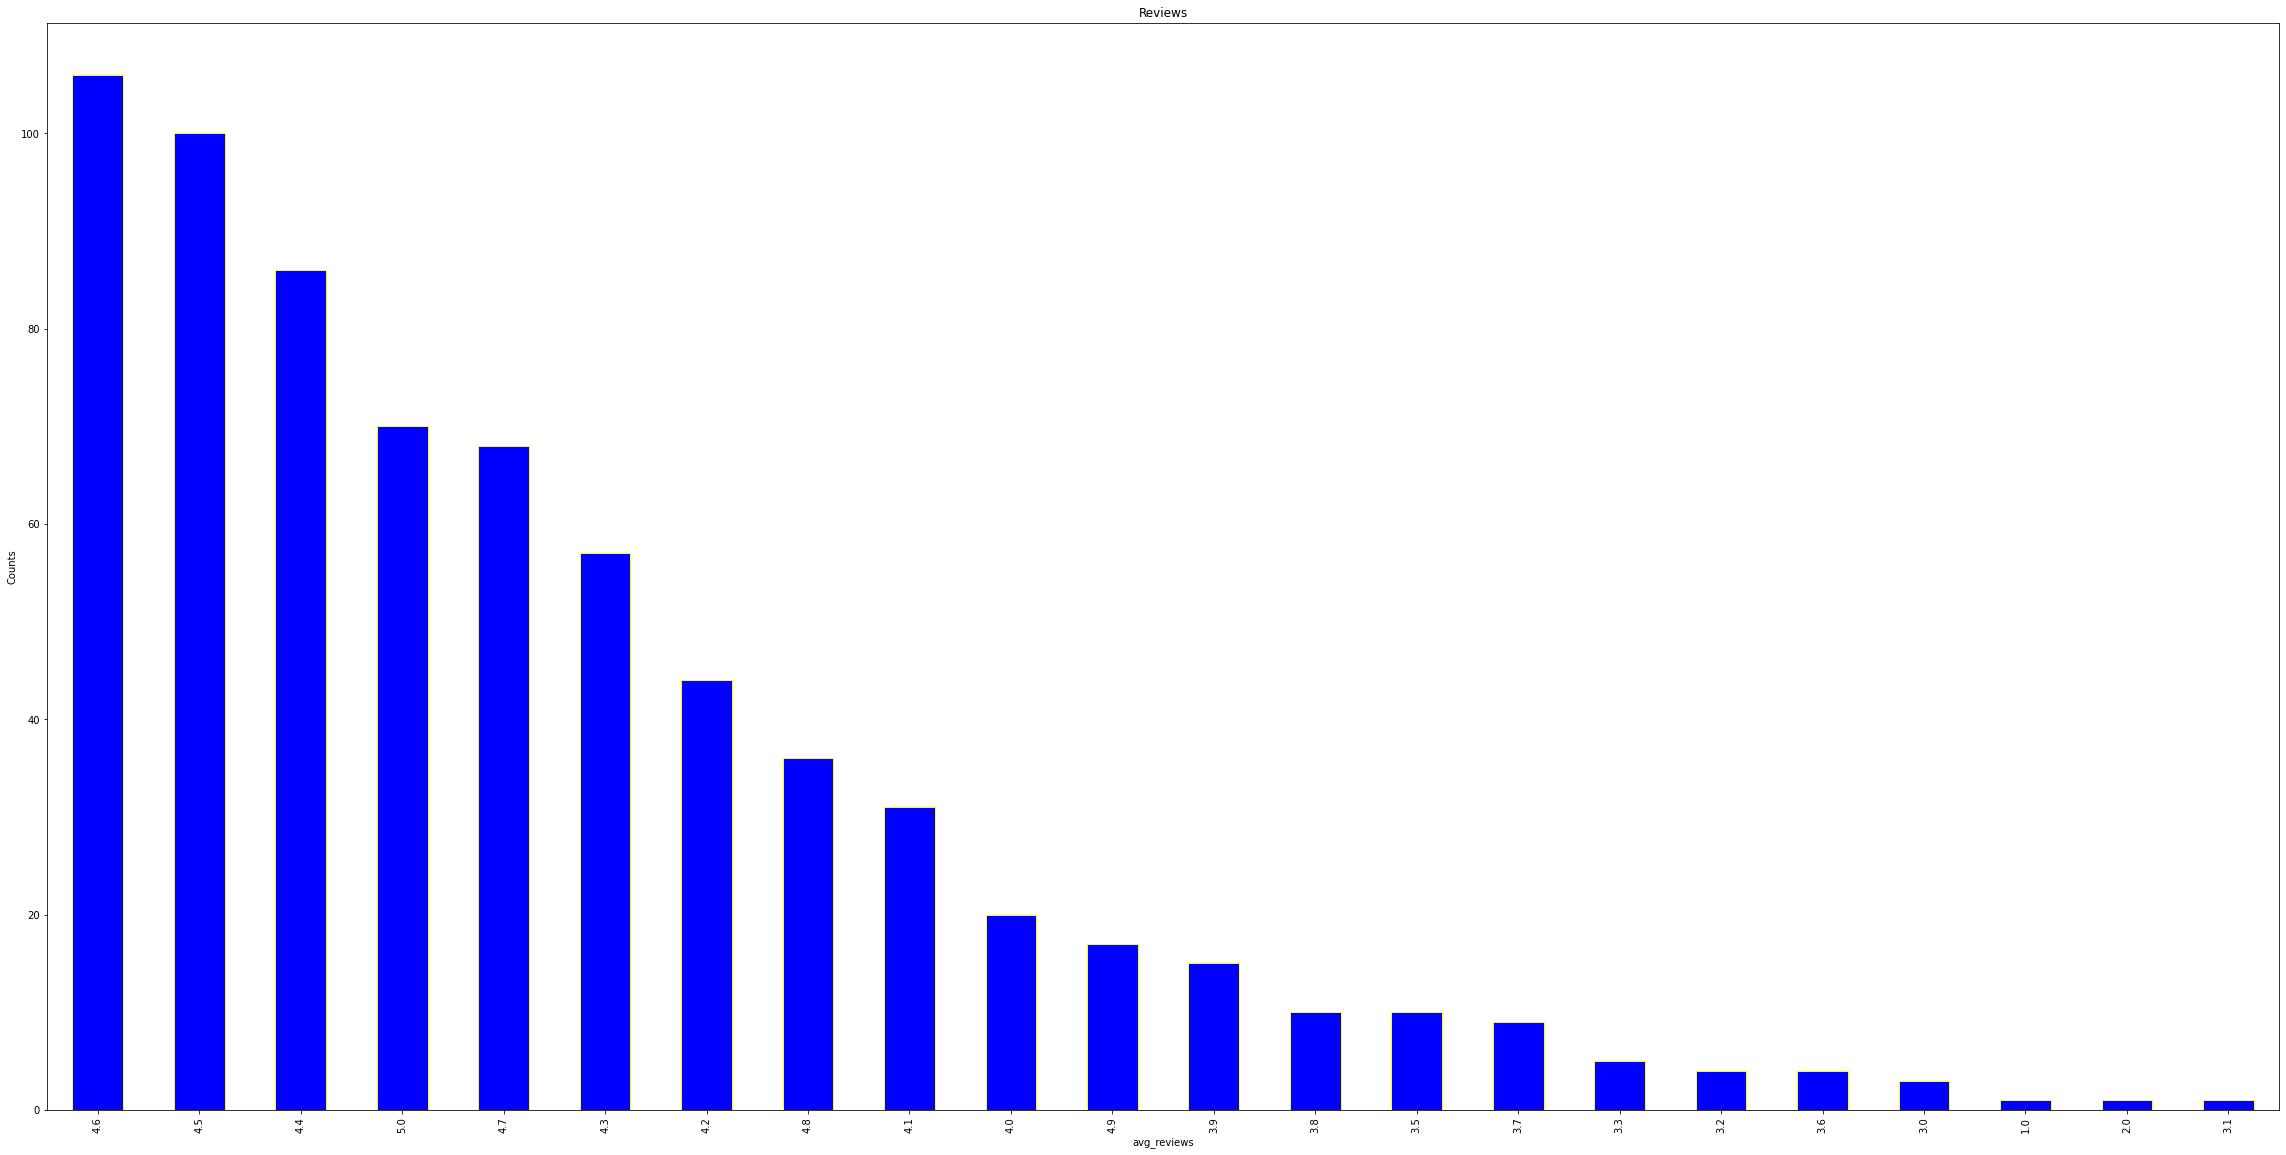

In [35]:
# barplot of above data
plt.figure(figsize=(40,20))
plt.title('Reviews')
plt.xlabel('avg_reviews')
plt.ylabel('Counts')
df['avg_reviews'].value_counts().plot(kind='bar',color='BLUE',edgecolor='yellow')
plt.show()

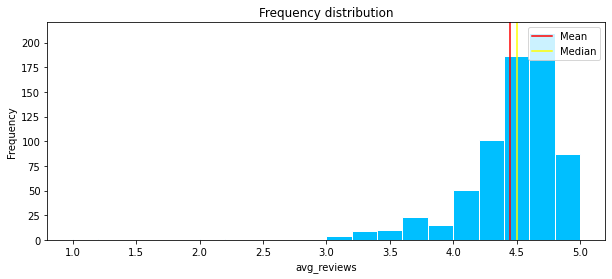

In [39]:
#Draw histogram of column quantity showing mean and median
plt.figure(figsize=(10,4))
plt.hist(df['avg_reviews'],color='deepskyblue',bins=20,edgecolor='white')
plt.axvline(df['avg_reviews'].mean(),label='Mean',color='red')
plt.axvline(df['avg_reviews'].median(),label='Median',color='yellow')
plt.legend(loc='upper right')
plt.xlabel('avg_reviews')
plt.ylabel('Frequency')
plt.title('Frequency distribution')
plt.show()

In [41]:
df['pages'].value_counts().plot()

<AxesSubplot: >

In [43]:
plt.figure(figsize=(10,4))
sns.distplot(df['pages'])
plt.show()

In [46]:
plt.figure(figsize=(8,8))
df['star1'].value_counts().plot.pie(autopct="%1.2f%%")

<AxesSubplot: ylabel='star1'>

As we see in thid pie chart blue (has occupied the space more compare to other #star1 ratings

In [50]:
sns.scatterplot(x='star1',y='star2',data=df,color='red')
plt.show()

<AxesSubplot: >

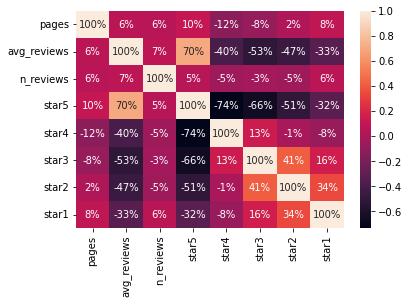

In [51]:
sns.heatmap(df.corr(),annot=True,fmt=".00%")

In [52]:
#Done by using heat Map

In [53]:
sns.pairplot(data=df)